# COMPSCI 369 - Assignment 2

- **Sabaoon Raza Khan**
- skha787@aucklanduni.ac.nz
- 983957824
<br>

### Problem 1: Pseudoinverse

#### Part (a)
For the grayscale image, forming a pseudoinverse matrix Pinv. <br>
Illustrating the obtained results by displaying Pinv, A and I as images 
(linearly scaling Pinv and I to the range [0,255] before displaying them).


P_inv =


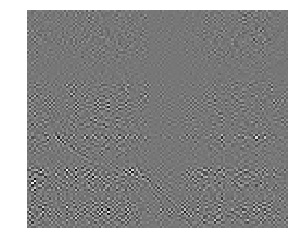


A =


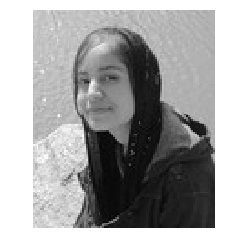


I =


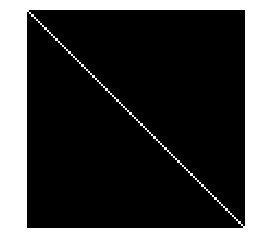

In [1]:
# Importing necessary packages
from matplotlib import pyplot
import re
import numpy
import numpy.linalg
import matplotlib.pyplot as plt


def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return numpy.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


def display_pgm(array):
    pyplot.imshow(array, pyplot.cm.gray)
    pyplot.axis('off')
    pyplot.show()

image = read_pgm("sabaoon.pgm")


# Creating pseudoinverse starts here -------------------------------------------------------------
U, D, Vt = numpy.linalg.svd(image)             # Performing SVD to find Pseudoinverse of image

V = numpy.transpose(Vt)
Dinv = numpy.diag(D**(-1))                     #Finding diagonal matrix inverse
Ut = numpy.transpose(U[: , :100])              #Trimming columns of U to size of image

Pinv = numpy.dot(V, numpy.dot(Dinv, Ut))       #Formula to find Pseudoinverse using SVD
# Creating pseudoinverse ends here ---------------------------------------------------------------    
    
    
I = numpy.matrix(Pinv) * numpy.matrix(image)   # Approximation to the 100 × 100 identity matrix.


# Function to rescale matrix values
def rescale(matrix):
    height, length = matrix.shape              # Matrix Dimensions
    minimum = matrix.min()                     
    maximum = matrix.max()
    new_matrix = numpy.empty([height, length]) # Creating a new matrix with the same dimensions, so the original isn't changed
    for i in range(height):
        for j in range(length):
            new_matrix[i, j] = 255 * ((matrix[i, j] - minimum) / (maximum - minimum)) # Given rescaling formula
    return new_matrix


# Displaying images
print("\nP_inv =")
display_pgm(rescale(Pinv))

print("\nA =")
display_pgm(image)

print("\nI =")
display_pgm(rescale(I))

#### Part (b)
Calculating the elementwise error matrix E = I_100 − I between the computed identity I & the actual identity matrix I_100.<br>
Displaying the matrix of absolute values of entries of E as an image, linearly scaling before displaying and calculating the range, mean and standard deviation of entries of E.


Eabs =


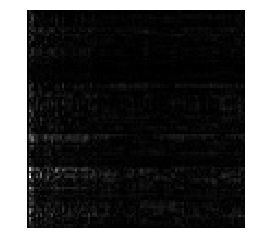

Range of E = ( -1.0304083975e-13 , 1.42005656366e-13 )
Mean of E = 9.7210027571e-17
Standard Deviation of E = 7.2054715027e-15


In [2]:
n = 100                                    # Initialising identity matrix size
I_100 = numpy.matrix(numpy.identity(n))    # Creating 100 x 100 identity matrix
                     
#Elementwise Error Matrix
E = I_100 - I
E_abs = numpy.fabs(E)

# For visualisation, linearly mapping values of the matrix elements E_abs to the range [0, 255].
Eabs_rescaled = rescale(E_abs)

print("\nEabs =")
display_pgm(Eabs_rescaled)

print("Range of E = (", E.min(), ",", E.max(), ")")
print("Mean of E =", E.mean())
print("Standard Deviation of E =", E.std())

<br>
### Problem 2: Principal components to find geographic structure
#### Part (a & b)

In [3]:
import math

# Q2(a)
# With the help of numpy.linalg.svd, writing code to read in the data matrix 
# and performing a principal components analysis of it (centering and scaling the matrix as well).

# Reading in data from given file
read_in = numpy.loadtxt('snps.txt')

# Taking transpose of data matrix
data = numpy.matrix(numpy.transpose(read_in))
m , n = data.shape

# Data Matrix centred & scaled:
mean = data.mean(axis = 1)
A = data - mean                                           # Centering by subtracting mean of matrix from original
Y = numpy.dot((1 / math.sqrt(n-1)), numpy.transpose(A))   # Scaling data using formula given in Lecture 8.8

# Finding covariance
covariance = numpy.dot(numpy.transpose(Y), Y) 

# Applying SVD to centred and scaled matrix Y
U, S, Vt = numpy.linalg.svd(Y)

# ------------------------------------------------------------------------------------------------------------------

# Q2(b)
# i) Printing out the first 5 entries of each of the first 5 principal component vectors.

# Columns of V are the principal components of A
V = numpy.transpose(Vt)
for i in range(1, 6):
    pci = V[:5, i-1:i]
    print(i, "th Principal Component Vector:\n", sep = "")
    print(pci)
    print()

# ii) Printing out the singular values corresponding to each of the 100 principal components in order.    
print("First 100 singular values:\n")
print(S[:100])

1th Principal Component Vector:

[[-0.00309649]
 [ 0.00967343]
 [ 0.01110168]
 [-0.02960344]
 [-0.02029166]]

2th Principal Component Vector:

[[ 0.0007713 ]
 [-0.00202   ]
 [ 0.00341425]
 [ 0.02310279]
 [-0.02630384]]

3th Principal Component Vector:

[[ 0.00668421]
 [-0.0031567 ]
 [-0.01207643]
 [ 0.00512964]
 [ 0.01816446]]

4th Principal Component Vector:

[[-0.02467032]
 [ 0.01048967]
 [-0.03225923]
 [ 0.01962407]
 [ 0.00753193]]

5th Principal Component Vector:

[[ 0.00117122]
 [-0.01353448]
 [ 0.00688643]
 [-0.01643924]
 [-0.05100944]]

First 100 singular values:

[  5.09446651e+00   3.48091903e+00   3.02265366e+00   3.00997976e+00
   2.99768948e+00   2.96751093e+00   2.96489665e+00   2.95102145e+00
   2.94488698e+00   2.92125537e+00   2.91542627e+00   2.89992617e+00
   2.88708559e+00   2.87940308e+00   2.86512274e+00   2.84936443e+00
   2.83973889e+00   2.81949451e+00   2.81183830e+00   2.80548121e+00
   2.79994663e+00   2.79033285e+00   2.77886006e+00   2.76955064e+00
   2.763

#### Part (c)
Project each data vector along the first two principal components to get a $100 × 2$
matrix $L$ in which entry $Lij$ corresponds to the amount of the $ith$ individual in the
direction of the $jth$ principal component. Print out $L$ in your report.

In [4]:
pc2 = V[:, :2] # First two principal components
L = numpy.transpose(data) * pc2
print("Matrix L =\n")
print(L)

Matrix L =

[[-12.25345945  -7.66429527]
 [-13.31654607  -5.23714412]
 [-13.37543386  -6.47311786]
 [-13.42642572   0.3636625 ]
 [-15.92288863   0.74686909]
 [-14.68502787  -0.59857039]
 [-13.81938536  -7.51558499]
 [-15.15975615   1.45318795]
 [-15.77602965   0.65129337]
 [-14.06883483  -5.88993335]
 [-14.01610033   0.18179319]
 [ -2.00172653  -0.74173201]
 [ -1.35411827  -1.3899567 ]
 [-13.72498617  -6.2981713 ]
 [ -2.01946814  -2.15120017]
 [-14.17543562   1.3568976 ]
 [-13.36615439  -0.09546892]
 [-14.2147831    2.02240075]
 [ -2.15193829  -0.43390261]
 [-13.9484748    0.19928523]
 [-14.66870428  -0.64094981]
 [ -1.71200916  -2.72280705]
 [-14.34130585   2.26695624]
 [-11.96829961  -8.14189593]
 [-14.91098254  -0.06427109]
 [-13.55784888  -4.55324331]
 [-13.70352075  -7.33297375]
 [ -1.56403991  -1.75443817]
 [-14.74362412   1.63828965]
 [-13.07938751  -6.01307742]
 [ -1.18860562  -2.26175799]
 [ -2.35532045  -1.29908707]
 [-14.84878959   1.16003582]
 [-13.89933484   1.54630099]
 [

#### Part (d)
Plot $L$. From your plot, determine the number of distinct subpopulations in the
data set and describe a rule for partitioning the space into the different subpopulations.
Include a list of the individuals (corresponding to row numbers) in the largest
subpopulation.

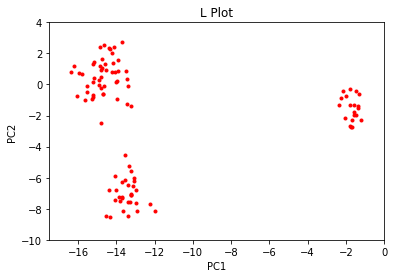

In [5]:
plt.title('L Plot')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.plot(L[:,0], L[:,1], 'r.')       # x-axis (Column 1) & y-axis (Column 2)
plt.axis([-17.5, 0, -10, 4])         # Setting the range for the x and y axes
plt.show()

As can be seen from the plot, there are 3 different distinct subpopulations in the data set.
<br>
A rule for partitioning the space for each of the subpopulations would be:<br>
- **Subpopulation 1:** $PC1 < -13$ & $PC2 > -3$
- **Subpopulation 2:** $PC1 < -11$ & $PC2 < -4$
- **Subpopulation 3:** $PC1 > -3$ & $PC2 > -4$

In [6]:
print("The list of individuals in the largest subpopulation (1):")
print()

rows, cols = L.shape
for num in range(rows):
    if L[num,0] < -13 and L[num,1] > -3:      # Following the rule for space partitioning
        print("Individual #", num + 1)

The list of individuals in the largest subpopulation (1):

Individual # 4
Individual # 5
Individual # 6
Individual # 8
Individual # 9
Individual # 11
Individual # 16
Individual # 17
Individual # 18
Individual # 20
Individual # 21
Individual # 23
Individual # 25
Individual # 29
Individual # 33
Individual # 34
Individual # 37
Individual # 41
Individual # 44
Individual # 45
Individual # 46
Individual # 48
Individual # 53
Individual # 54
Individual # 56
Individual # 58
Individual # 59
Individual # 60
Individual # 62
Individual # 64
Individual # 68
Individual # 69
Individual # 70
Individual # 71
Individual # 74
Individual # 76
Individual # 77
Individual # 80
Individual # 81
Individual # 84
Individual # 85
Individual # 86
Individual # 88
Individual # 89
Individual # 91
Individual # 94
Individual # 95
Individual # 98
Individual # 100


<br>
### Problem 3: Sampling from some common distributions 
#### Part i. (a)
**Poisson Distribution** --> Parameters: <br>
(1 customer/15 minutes = 4 customers/hour)
- $λ = 4$

#### Part i. (b & c)
Creating a histogram of the given distribution, and finding the mean and variance.

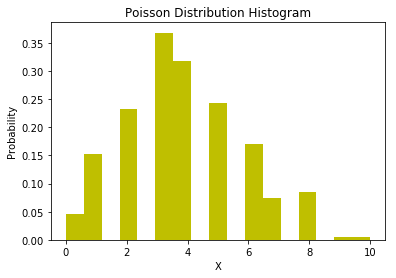


Mean of sampled data = 3.84333333333
Variance of sampled data = 3.91212222222

Theoretical mean = 4
Theoretical variance = 4

Comparing the theoretical mean and variance to each of the sampled results, we get small variations each time we sample.
The difference between the theoretical and sampled mean is: 0.156666666667
The difference between the theoretical and sampled variance is: 0.0878777777778


In [7]:
λ = 4   
size = 300                                                    # Sample size
bin_size = int(math.sqrt(size))                               # Finding bin size from number of samples & converting to integers

s = numpy.random.poisson(λ, size)                             # Randomly samplng values for each distribution

count, bins, ignored = plt.hist(s, bin_size, normed=True, color='y')     # Creating histogram of sampled values
plt.title('Poisson Distribution Histogram')
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

ExpVal = numpy.mean(s)                                        # Expected Value / Mean for sampled data
Var = numpy.var(s)                                            # Variance for sampled data
print()
print("Mean of sampled data =", ExpVal)
print("Variance of sampled data =", Var)

T_mean = λ
T_var = λ
print()
print("Theoretical mean =", T_mean)                           # Theoretical Mean given the parameters
print("Theoretical variance =", T_var)                        # Theoretical Variance "" "" ""

print()
print("Comparing the theoretical mean and variance to each of the sampled results, we get small variations each time we sample.")
print("The difference between the theoretical and sampled mean is:", T_mean - ExpVal)
print("The difference between the theoretical and sampled variance is:", T_var - Var)

#### Part ii. (a)
**Exponential Distribution** --> Parameters: <br>
(Death rate for a type of tree is 0.01 per year)
- $λ = 0.01$ 

#### Part ii. (b & c)
Creating a histogram of the given distribution, and finding the mean and variance.

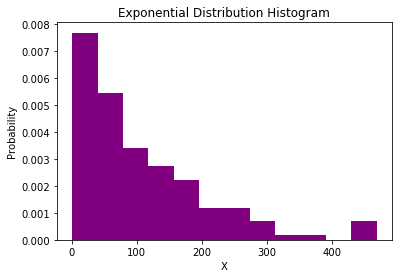


Mean of sampled data = 106.619248505
Variance of sampled data = 9818.9356687

Theoretical mean = 100.0
Theoretical variance = 10000.0

Comparing the theoretical mean and variance to each of the sampled results, we get small variations each time we sample.
The difference between the theoretical and sampled mean is: -6.61924850481
The difference between the theoretical and sampled variance is: 181.064331302


In [8]:
λ = 0.01
size = 150
bin_size = int(math.sqrt(size))

s = numpy.random.exponential(1/λ, size)                        # Randomly samplng values for each distribution

count, bins, ignored = plt.hist(s, bin_size, normed=True, color='purple')      # Creating histogram of sampled values
plt.title('Exponential Distribution Histogram')
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

ExpVal = numpy.mean(s)                                         # Expected Value
Var = numpy.var(s)                                             # Variance
print()
print("Mean of sampled data =", ExpVal)
print("Variance of sampled data =", Var)

T_mean = 1 / λ
T_var = 1 / (λ**2)
print()
print("Theoretical mean =", T_mean)
print("Theoretical variance =", T_var)

print()
print("Comparing the theoretical mean and variance to each of the sampled results, we get small variations each time we sample.")
print("The difference between the theoretical and sampled mean is:", T_mean - ExpVal)
print("The difference between the theoretical and sampled variance is:", T_var - Var)

#### Part iii. (a)
**Binomial Distribution** --> Parameters: <br>
(On average 75% of the eggs are predated before hatching, so 25% are those that successfully hatch)
- $n = 24$
- $p = 0.25$

#### Part iii. (b & c)
Creating a histogram of the given distribution, and finding the mean and variance.

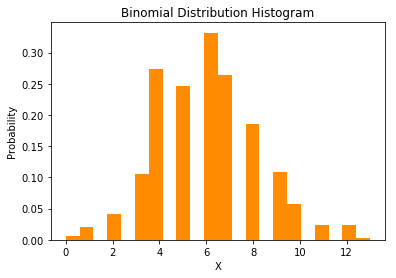


Mean of sampled data = 6.036
Variance of sampled data = 4.846704

Theoretical mean = 6.0
Theoretical variance = 4.5

Comparing the theoretical mean and variance to each of the sampled results, we get small variations each time we sample.
The difference between the theoretical and sampled mean is: -0.036
The difference between the theoretical and sampled variance is: -0.346704


In [9]:
n, p = 24, 0.25                                               # Number of trials, Probability of each trial
q = 1 - p
size = 500
bin_size = int(math.sqrt(size))

s = numpy.random.binomial(n, p, size)                         # Randomly samplng values for each distribution

count, bins, ignored = plt.hist(s, bin_size, normed=True, color='darkorange')     # Creating histogram of sampled values
plt.title('Binomial Distribution Histogram')
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

ExpVal = numpy.mean(s)                                        # Expected Value
Var = numpy.var(s)                                            # Variance
print()
print("Mean of sampled data =", ExpVal)
print("Variance of sampled data =", Var)

T_mean = n*p
T_var = n*p*q
print()
print("Theoretical mean =", T_mean)
print("Theoretical variance =", T_var)

print()
print("Comparing the theoretical mean and variance to each of the sampled results, we get small variations each time we sample.")
print("The difference between the theoretical and sampled mean is:", T_mean - ExpVal)
print("The difference between the theoretical and sampled variance is:", T_var - Var)

#### Part iv. (a)
**Normal Distribution** --> Parameters: <br>
- $μ = 7$
- $σ^2 = 1$

#### Part iv. (b & c)
Creating a histogram of the given distribution, and finding the mean and variance.

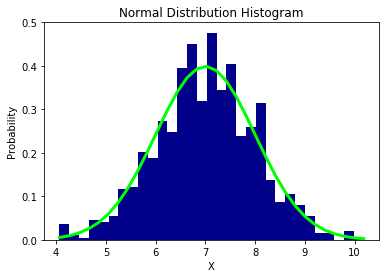


Mean of sampled data = 7.01359867621
Variance of sampled data = 1.00303247716

Theoretical mean = 7
Theoretical variance = 1

Comparing the theoretical mean and variance to each of the sampled results, we get small variations each time we sample.
The difference between the theoretical and sampled mean is: -0.0135986762124
The difference between the theoretical and sampled variance is: -0.00303247716227


In [10]:
μ, σ = 7, 1                                                      # Mean & Standard deviation
size = 1000
bin_size = int(math.sqrt(size))

s = numpy.random.normal(μ, σ, size)                              # Randomly samplng values for each distribution

count, bins, ignored = plt.hist(s, bin_size, normed=True, color='darkblue')        # Creating histogram of sampled values

# Plotting a curve to show the shape of the graph
plt.plot(bins, 1/(σ * numpy.sqrt(2 * numpy.pi)) * numpy.exp( - (bins - μ)**2 / (2 * σ**2) ), linewidth=3, color='lime') 
plt.title('Normal Distribution Histogram')
plt.xlabel("X")
plt.ylabel("Probability")
plt.show()

ExpVal = numpy.mean(s)                                           # Expected Value
Var = numpy.var(s)                                               # Variance
print()
print("Mean of sampled data =", ExpVal)
print("Variance of sampled data =", Var)

T_mean = μ
T_var = σ**2
print()
print("Theoretical mean =", T_mean)
print("Theoretical variance =", T_var)

print()
print("Comparing the theoretical mean and variance to each of the sampled results, we get small variations each time we sample.")
print("The difference between the theoretical and sampled mean is:", T_mean - ExpVal)
print("The difference between the theoretical and sampled variance is:", T_var - Var)